<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Mood_Disorder_%26_Healthy_Control_Prediction_Model%20-%20random_fit%20pass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier from sklearn.model selection import train _test_split # Import train _test_split function
from sklearn import metrics

In [122]:
import random
random.seed(15)

data = pd.read_csv('/content/EEG.machinelearing_data_BRMH 2.csv')


In [123]:
import pandas as pd

feature_cols = data.columns[8:].tolist()
feature_cols += ['specific.disorder']

print(feature_cols)

['AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz', 'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3', 'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4', 'AB.A.delta.l.T4', 'AB.A.delta.m.T5', 'AB.A.delta.n.P3', 'AB.A.delta.o.Pz', 'AB.A.delta.p.P4', 'AB.A.delta.q.T6', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2', 'AB.B.theta.a.FP1', 'AB.B.theta.b.FP2', 'AB.B.theta.c.F7', 'AB.B.theta.d.F3', 'AB.B.theta.e.Fz', 'AB.B.theta.f.F4', 'AB.B.theta.g.F8', 'AB.B.theta.h.T3', 'AB.B.theta.i.C3', 'AB.B.theta.j.Cz', 'AB.B.theta.k.C4', 'AB.B.theta.l.T4', 'AB.B.theta.m.T5', 'AB.B.theta.n.P3', 'AB.B.theta.o.Pz', 'AB.B.theta.p.P4', 'AB.B.theta.q.T6', 'AB.B.theta.r.O1', 'AB.B.theta.s.O2', 'AB.C.alpha.a.FP1', 'AB.C.alpha.b.FP2', 'AB.C.alpha.c.F7', 'AB.C.alpha.d.F3', 'AB.C.alpha.e.Fz', 'AB.C.alpha.f.F4', 'AB.C.alpha.g.F8', 'AB.C.alpha.h.T3', 'AB.C.alpha.i.C3', 'AB.C.alpha.j.Cz', 'AB.C.alpha.k.C4', 'AB.C.alpha.l.T4', 'AB.C.alpha.m.T5', 'AB.C.alpha.n.P3', 'AB.C

In [124]:
#feature_cols = ['AB.A.delta.a.FP1', 'AB.A.delta.b.FP2','AB.A.delta.c.F7','AB.A.delta.d.F3','AB.A.delta.e.Fz',	'AB.A.delta.f.F4',	'AB.A.delta.g.F8',	'AB.A.delta.h.T3',	'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4',	'AB.A.delta.l.T4',	'AB.A.delta.m.T5',	'AB.A.delta.n.P3',	'AB.A.delta.o.Pz',	'AB.A.delta.p.P4',	'AB.A.delta.q.T6',	'AB.A.delta.r.O1',	'AB.A.delta.s.O2',	'AB.B.theta.a.FP1',	'AB.B.theta.b.FP2',	'AB.B.theta.c.F7',	'AB.B.theta.d.F3',	'AB.B.theta.e.Fz',	'AB.B.theta.f.F4',	'AB.B.theta.g.F8',	'AB.B.theta.h.T3',	'AB.B.theta.i.C3',	'AB.B.theta.j.Cz',	'AB.B.theta.k.C4',	'AB.B.theta.l.T4',	'AB.B.theta.m.T5',	'AB.B.theta.n.P3',	'AB.B.theta.o.Pz',	'AB.B.theta.p.P4',	'AB.B.theta.q.T6',	'AB.B.theta.r.O1',	'AB.B.theta.s.O2',	'AB.C.alpha.a.FP1',	'AB.C.alpha.b.FP2',	'AB.C.alpha.c.F7',	'AB.C.alpha.d.F3',	'AB.C.alpha.e.Fz',	'AB.C.alpha.f.F4',	'AB.C.alpha.g.F8',	'AB.C.alpha.h.T3',	'AB.C.alpha.i.C3',	'AB.C.alpha.j.Cz',	'AB.C.alpha.k.C4',	'AB.C.alpha.l.T4',	'AB.C.alpha.m.T5',	'AB.C.alpha.n.P3',	'AB.C.alpha.o.Pz',	'AB.C.alpha.p.P4',	'AB.C.alpha.q.T6',	'AB.C.alpha.r.O1',	'AB.C.alpha.s.O2',	'AB.D.beta.a.FP1',	'AB.D.beta.b.FP2',	'AB.D.beta.c.F7',	'AB.D.beta.d.F3',	'AB.D.beta.e.Fz',	'AB.D.beta.f.F4',	'AB.D.beta.g.F8',	'AB.D.beta.h.T3',	'AB.D.beta.i.C3',	'AB.D.beta.j.Cz',	'AB.D.beta.k.C4',	'AB.D.beta.l.T4',	'AB.D.beta.m.T5',	'AB.D.beta.n.P3',	'AB.D.beta.o.Pz',	'AB.D.beta.p.P4',	'AB.D.beta.q.T6',	'AB.D.beta.r.O1',	'AB.D.beta.s.O2',	'AB.E.highbeta.a.FP1',	'AB.E.highbeta.b.FP2',	'AB.E.highbeta.c.F7',	'AB.E.highbeta.d.F3', 'AB.E.highbeta.e.Fz',	'AB.E.highbeta.f.F4',	'AB.E.highbeta.g.F8',	'AB.E.highbeta.h.T3',	'AB.E.highbeta.i.C3',	'AB.E.highbeta.j.Cz',	'AB.E.highbeta.k.C4',	'AB.E.highbeta.l.T4',	'AB.E.highbeta.m.T5',	'AB.E.highbeta.n.P3',	'AB.E.highbeta.o.Pz',	'AB.E.highbeta.p.P4',	'AB.E.highbeta.q.T6',	'AB.E.highbeta.r.O1',	'AB.E.highbeta.s.O2',	'AB.F.gamma.a.FP1',	'AB.F.gamma.b.FP2',	'AB.F.gamma.c.F7',	'AB.F.gamma.d.F3',	'AB.F.gamma.e.Fz',	'AB.F.gamma.f.F4',	'AB.F.gamma.g.F8',	'AB.F.gamma.h.T3',	'AB.F.gamma.i.C3',	'AB.F.gamma.j.Cz',	'AB.F.gamma.k.C4',	'AB.F.gamma.l.T4',	'AB.F.gamma.m.T5',	'AB.F.gamma.n.P3',	'AB.F.gamma.o.Pz',	'AB.F.gamma.p.P4',	'AB.F.gamma.q.T6',	'AB.F.gamma.r.O1',	'AB.F.gamma.s.O2', 'main.disorder']

X = data[feature_cols] # Features
X[~X.isnull().any(axis=1)]

y = data.loc[(data["specific.disorder"] == "Behavioral addiction disorder") | (data["specific.disorder"] == "Healthy control"), "specific.disorder"]

X = X.loc[y.index]
X = X.drop(columns=["specific.disorder"])


In [127]:
y = y.astype('str')
X = X.astype('float')
if not X.empty and not y.empty:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 70% training and 30% test
  print("X_train shape:", X_train.shape)
  print("y_train shape:", y_train.shape)
  print("X_test shape:", X_test.shape)
  print("y_test shape:", y_test.shape)


X_train shape: (169, 1141)
y_train shape: (169,)
X_test shape: (19, 1141)
y_test shape: (19,)


In [128]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)
sample = data.iloc[136, 8:]
sample_df = sample.to_frame().T
print("Predicted class:", clf.predict(sample_df))

sample_accuracy = metrics.accuracy_score([y_train.iloc[136]], clf.predict(sample_df))
print("Sample Accuracy:", sample_accuracy)



# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Predicted class: ['Healthy control']
Sample Accuracy: 1.0
Accuracy: 0.6842105263157895


In [129]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 1)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [130]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [135]:
rf = RandomForestRegressor(random_state = 1)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='neg_mean_absolute_error',
                              cv = 3, verbose=2, random_state=1, n_jobs=-1,
                              return_train_score=True)

if (y == "Behavioral addiction disorder").any():
    y[y == "Behavioral addiction disorder"] = 1.0
if (y == "Healthy control").any():
    y[y == "Healthy control"] = 0.0
rf_random.fit(X_train,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
58 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [136]:
rf_random.best_params_


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': False}

In [137]:
rf_random.cv_results_

{'mean_fit_time': array([5.22597631e-03, 6.54715300e+00, 1.77717741e+00, 4.39314079e+00,
        2.61410077e-03, 3.74001010e+00, 2.43482780e+00, 2.34429042e-03,
        2.30121613e-03, 3.32498550e-03, 2.38053004e-03, 1.65117129e+00,
        2.58946419e-03, 2.50228246e-03, 7.74284132e+00, 2.31973330e-03,
        1.76388462e+00, 2.40357717e-03, 1.98257987e+00, 2.49727241e+00,
        6.68413361e+00, 9.21826816e+00, 3.01177581e+00, 5.50076278e+00,
        6.56947184e+00, 3.65201974e+00, 7.88748312e+00, 2.33229001e-03,
        2.52016385e-03, 2.19098727e-03, 7.44958973e+00, 5.68902938e+00,
        9.70546945e+00, 2.33856837e-03, 9.31005367e+00, 7.31882215e+00,
        4.83316398e+00, 7.16033936e+00, 8.24917157e-01, 7.97955044e+00,
        2.33666102e-03, 7.16217923e+00, 2.47232119e-03, 6.94817058e+00,
        6.42680478e+00, 7.92333190e+00, 9.64631017e+00, 2.95567513e-03,
        8.14738274e-01, 6.26133601e+00, 2.44004234e+00, 4.02780509e+00,
        6.45451601e+00, 2.46747335e-03, 2.42408

In [138]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [144]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 1)
if (y == "Behavioral addiction disorder").any():
    y[y == "Behavioral addiction disorder"] = 1.0
if (y == "Healthy control").any():
    y[y == "Healthy control"] = 2.0
if not X.empty and not y.empty:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 70% training and 30% test

base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

ZeroDivisionError: float division by zero

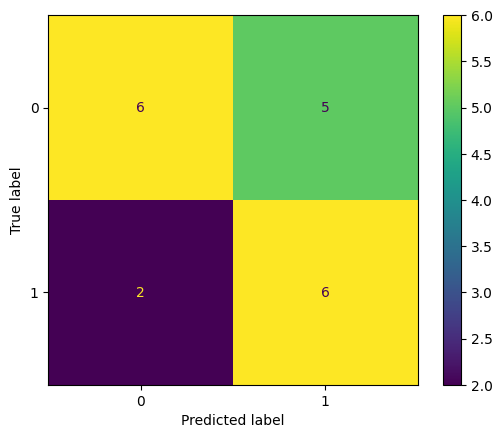

In [69]:
# Generate predictions with the best model
#y_test_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [46]:
!pip install graphviz
!pip install pydotplus

Shape of X_train_clean: (0, 1141)
Shape of y_train_clean: (0,)


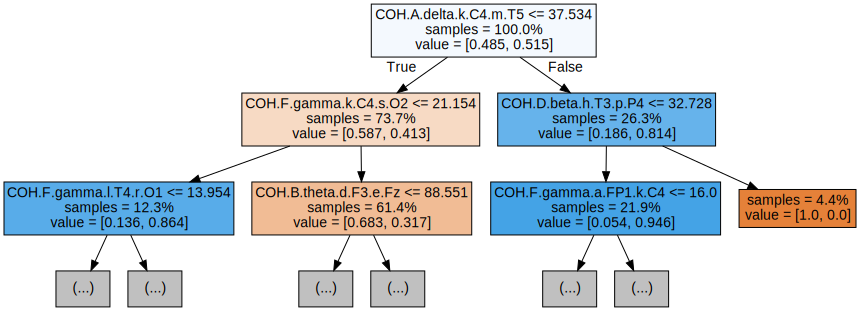

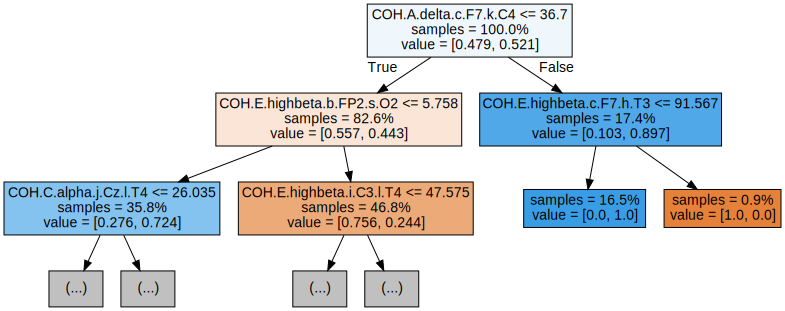

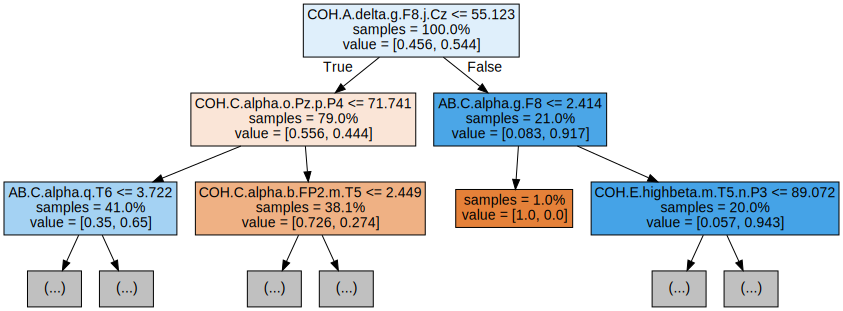

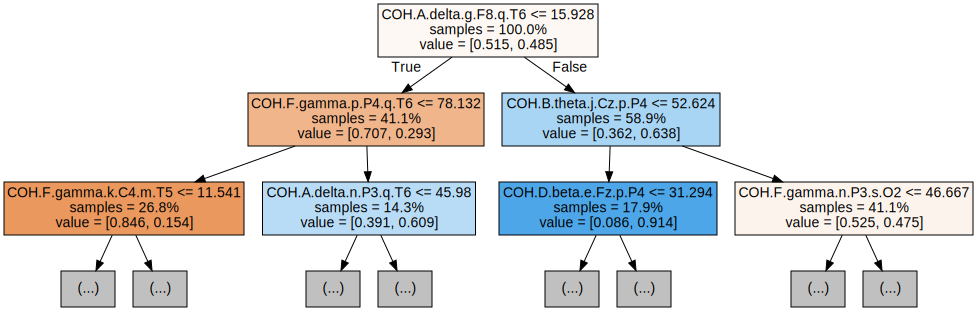

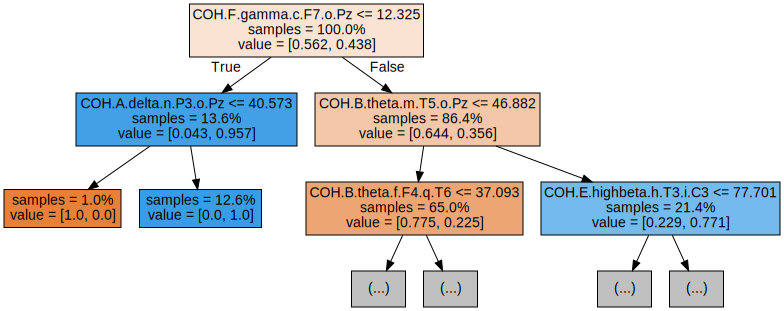

In [72]:
from sklearn.tree import export_graphviz
from io import StringIO  # Replacing six's StringIO
from IPython.display import Image
import pydotplus

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Drop rows with missing values
#X_train_clean = X_train.dropna()
#y_train_clean = y_train[X_train_clean.index]

#print("Shape of X_train_clean:", X_train_clean.shape)
#print("Shape of y_train_clean:", y_train_clean.shape)

# Train the random forest on the cleaned dataset
#rf.fit(X_train_clean, y_train_clean)
rf.fit(X_train, y_train)

# Export and display the first three trees
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_clean.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)